# Thyroid hormone transport (=uptake) assay

Different Endocrine Disruptor Chemicals (EDCs) were tested for inhibition of thyroid hormone uptake in three cell lines: H4, MO3.13 and SK-N-AS.

    Output raw data: counts per minute
    Machine: 2470 Automatic Gamma Counter (Perkin Elmer)
    Output (processed): percentage uptake compared to solvent control

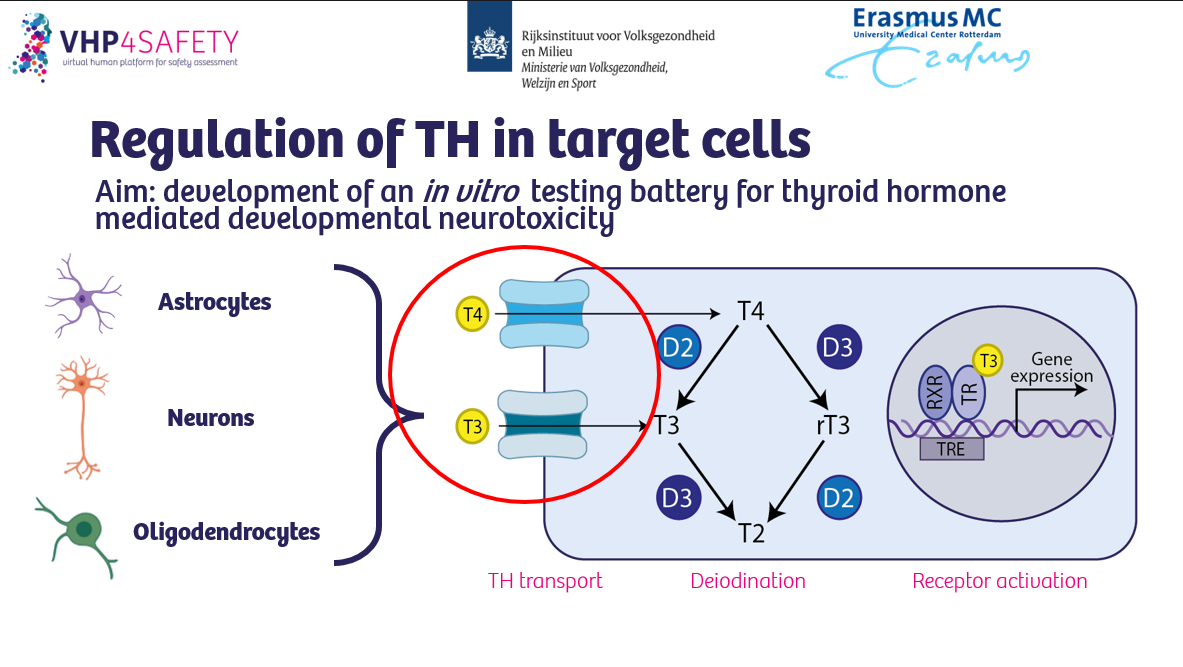 


## Files

- [data/004640.csv](data/004640.csv): raw data
- [data/20240306_CP_TBBPA_BSP_NH3_IOP.xlsx](data/20240306_CP_TBBPA_BSP_NH3_IOP.xlsx): workbook used to process the raw data. The `uptake dd-mm` tab contains the formulas used to process this kind of data.

## Concept for the notebook: 
- Reproduce the `uptake dd-mm` sheet from the raw data file and necessary information
- In other words: **parse 2470 Automatic Gamma Counter (Perkin Elmer) output csv files and return desired output**
- To be turned into a package / package module

In [1]:
import pandas as pd
import numpy as np

In [2]:
columns = ["thyroid", "edcs", "Tracermix", "cpm 1 (raw)", "cpm 2 (raw)", "cpm average (raw)", "cpm 1 corrected", "cpm 2 corrected", "average cpm corrected", "%uptake 1 tov DMSO", "%uptake 2 tov DMSO", "avg %uptake", "std %uptake"]

## Looking at the result tables

The results sheet contains 4 different tables:

| Table Name     | Definition | Cellosaurus | EFO | CLO | Wikidata |
|----------------|-------------|-------------|-----|-----|----------|
| uptake_df_h4   | for H4 cells | [CVCL_1239](https://www.cellosaurus.org/CVCL_1239) | [EFO_0002184](http://www.ebi.ac.uk/efo/EFO_0002184) | [CLO_0003599](http://purl.obolibrary.org/obo/CLO_0003599) | [Q54872126](https://www.wikidata.org/wiki/Q54872126) |
| uptake_df_mo   | for MO3.13 cells | [CVCL_D357](https://www.cellosaurus.org/CVCL_D357) | [EFO_0022639](http://www.ebi.ac.uk/efo/EFO_0022639) | | [Q54906285](https://www.wikidata.org/wiki/Q54906285) |
| uptake_df_sknas| for SK-N-AS cells | [CVCL_1700](https://www.cellosaurus.org/CVCL_1700) | [EFO_0002859](http://www.ebi.ac.uk/efo/EFO_0002859) | [CLO_0009051](http://purl.obolibrary.org/obo/CLO_0009051) | [Q54954411](https://www.wikidata.org/wiki/Q54954411) |

In [3]:
uptake_df_h4 = pd.read_excel(
    "data/20240306_ CP_TBBPA_BSP_NH3_IOP.xlsx",
    sheet_name="uptake 06-03",
    skiprows=6,
    header=0,
    usecols="I:U",
    nrows=35
)
uptake_df_h4.columns = columns
uptake_df_h4["thyroid"].fillna(method="ffill", inplace=True)
uptake_df_h4

,thyroid,edcs,Tracermix,cpm 1 (raw),cpm 2 (raw),cpm average (raw),cpm 1 corrected,cpm 2 corrected,average cpm corrected,%uptake 1 tov DMSO,%uptake 2 tov DMSO,avg %uptake,std %uptake
0,T3,10 µM BSP,25329.000,3258.09,3573.00,3415.545,0.128631,0.141064,0.134847,1.093807,1.199529,1.146668,0.074757
1,T3,30 µM BSP,26447.975,3102.45,3633.63,3368.040,0.117304,0.137388,0.127346,0.997489,1.168272,1.082880,0.120762
2,T3,100 µM BSP,29032.875,3287.48,3410.66,3349.070,0.113233,0.117476,0.115354,0.962872,0.998951,0.980912,0.025511
3,T3,300 µM BSP,29574.425,2789.60,2599.90,2694.750,0.094325,0.087910,0.091118,0.802087,0.747543,0.774815,0.038568
4,T3,0.1 µM CP,20779.175,2573.05,2559.28,2566.165,0.123828,0.123166,0.123497,1.052969,1.047334,1.050152,0.003985
5,T3,1 µM CP,18900.300,2452.88,2841.94,2647.410,0.129780,0.150365,0.140072,1.103579,1.278621,1.191100,0.123774
6,T3,10 µM CP,23235.250,2960.18,2770.89,2865.535,0.127400,0.119254,0.123327,1.083344,1.014069,1.048707,0.048985
7,T3,20 µM CP,21901.650,2456.52,2574.77,2515.645,0.112161,0.117561,0.114861,0.953760,0.999671,0.976716,0.032464
8,T3,0.3 µM TBBPA,23555.750,2781.43,3028.87,2905.150,0.118079,0.128583,0.123331,1.004077,1.093401,1.048739,0.063162
9,T3,1 µM TBBPA,23197.450,3091.79,2905.69,2998.740,0.133281,0.125259,0.129270,1.133354,1.065135,1.099244,0.048238


In [4]:
uptake_df_mo = pd.read_excel(
    "data/20240306_ CP_TBBPA_BSP_NH3_IOP.xlsx",
    sheet_name="uptake 06-03",
    skiprows=43,
    header=0,
    usecols="I:U",
    nrows=35,
)
uptake_df_mo.columns = columns
uptake_df_mo["thyroid"].fillna(method="ffill", inplace=True)
uptake_df_mo

,thyroid,edcs,Tracermix,cpm 1 (raw),cpm 2 (raw),cpm average (raw),cpm 1 corrected,cpm 2 corrected,average cpm corrected,%uptake 1 tov DMSO,%uptake 2 tov DMSO,avg %uptake,std %uptake
0,T3,10 µM BSP,25329.000,3229.40,3134.35,3181.875,0.127498,0.123746,0.125622,1.087617,1.055605,1.071611,0.022636
1,T3,30 µM BSP,26447.975,3145.25,3221.38,3183.315,0.118922,0.121801,0.120361,1.014460,1.039015,1.026737,0.017363
2,T3,100 µM BSP,29032.875,2720.88,2820.06,2770.470,0.093717,0.097133,0.095425,0.799450,0.828591,0.814021,0.020606
3,T3,300 µM BSP,29574.425,2456.12,2193.42,2324.770,0.083049,0.074166,0.078607,0.708444,0.632670,0.670557,0.053580
4,T3,0.1 µM CP,20779.175,2427.46,2459.94,2443.700,0.116822,0.118385,0.117603,0.996543,1.009877,1.003210,0.009429
5,T3,1 µM CP,18900.300,2419.47,2542.38,2480.925,0.128012,0.134515,0.131264,1.092003,1.147477,1.119740,0.039226
6,T3,10 µM CP,23235.250,2703.57,2668.21,2685.890,0.116356,0.114835,0.115595,0.992573,0.979591,0.986082,0.009180
7,T3,20 µM CP,21901.650,2453.49,2483.47,2468.480,0.112023,0.113392,0.112707,0.955608,0.967284,0.961446,0.008257
8,T3,0.3 µM TBBPA,23555.750,2701.90,2815.78,2758.840,0.114702,0.119537,0.117120,0.978463,1.019703,0.999083,0.029161
9,T3,1 µM TBBPA,23197.450,2858.11,2846.79,2852.450,0.123208,0.122720,0.122964,1.051020,1.046857,1.048938,0.002943


In [5]:
uptake_df_sknas = pd.read_excel(
    "data/20240306_ CP_TBBPA_BSP_NH3_IOP.xlsx",
    sheet_name="uptake 06-03",
    skiprows=80,
    header=0,
    usecols="I:U",
    nrows=35,  # Read until row 41 (41 - 6 = 35)
)
uptake_df_sknas.columns = columns
uptake_df_sknas["thyroid"].fillna(method="ffill", inplace=True)
uptake_df_sknas

,thyroid,edcs,Tracermix,cpm 1 (raw),cpm 2 (raw),cpm average (raw),cpm 1 corrected,cpm 2 corrected,average cpm corrected,%uptake 1 tov DMSO,%uptake 2 tov DMSO,avg %uptake,std %uptake
0,T3,10 µM BSP,25329.000,1378.89,1533.43,1456.160,0.054439,0.060540,0.057490,1.196331,1.330411,1.263371,0.094809
1,T3,30 µM BSP,26447.975,1324.24,1596.60,1460.420,0.050070,0.060368,0.055219,1.100308,1.326611,1.213459,0.160021
2,T3,100 µM BSP,29032.875,1477.79,1448.70,1463.245,0.050901,0.049899,0.050400,1.118568,1.096550,1.107559,0.015570
3,T3,300 µM BSP,29574.425,1190.89,1099.46,1145.175,0.040268,0.037176,0.038722,0.884902,0.816964,0.850933,0.048039
4,T3,0.1 µM CP,20779.175,1040.63,1065.40,1053.015,0.050080,0.051272,0.050676,1.100545,1.126741,1.113643,0.018523
5,T3,1 µM CP,18900.300,962.13,1005.36,983.745,0.050906,0.053193,0.052049,1.118678,1.168942,1.143810,0.035542
6,T3,10 µM CP,23235.250,982.37,1157.68,1070.025,0.042279,0.049824,0.046052,0.929111,1.094917,1.012014,0.117242
7,T3,20 µM CP,21901.650,876.84,1058.70,967.770,0.040035,0.048339,0.044187,0.879799,1.062273,0.971036,0.129028
8,T3,0.3 µM TBBPA,23555.750,1236.11,1304.95,1270.530,0.052476,0.055398,0.053937,1.153188,1.217410,1.185299,0.045412
9,T3,1 µM TBBPA,23197.450,1178.88,1188.11,1183.495,0.050819,0.051217,0.051018,1.116784,1.125528,1.121156,0.006183


The three tables share the same structure:
- `thyroid`: which Thyroid hormone
- `edcs`: column with the perturbagen concentration
- `Tracermix`:
- `cpm X (raw)`: X being the number of cpm
- `cpm average (raw)`= AVERAGE(`cpm X (raw)`)
- `cpm X corrected`= `cpm average (raw)`
- `average cpm corrected`
- `%uptake X tov DMSO`
- `avg %uptake`
- `std %uptake`: = 

In [6]:
cpm_df = pd.read_excel(
    "data/20240306_ CP_TBBPA_BSP_NH3_IOP.xlsx",
    sheet_name="uptake 06-03",
    skiprows=3,
    header=0,
    usecols="B:G",
)
cpm_df.columns = ["treatment", "input", "cpm1", "cpm2", "cpm_average", "cpm_375uL"]
cpm_df.drop(index=0, inplace=True)
cpm_df["treatment"].fillna(method="ffill", inplace=True)

cpm_df

,treatment,input,cpm1,cpm2,cpm_average,cpm_375uL
1,NaN,T3 no BSA,9013.47,9686.52,9349.995,9349.995
2,NaN,T4 no BSA,11666.81,11814.8,11740.805,11740.805
3,T3,10 µM BSP,4919.63,5211.97,5065.8,25329
4,T3,30 µM BSP,5183.99,5395.2,5289.595,26447.975
5,T3,100 µM BSP,5807.46,5805.69,5806.575,29032.875
...,...,...,...,...,...,...
106,T4,NaN,NaN,NaN,NaN,NaN
107,T4,NaN,NaN,NaN,NaN,NaN
108,T4,NaN,NaN,NaN,NaN,NaN
109,T4,NaN,NaN,NaN,NaN,NaN


## From raw data to result tables

In [7]:
raw_df = pd.read_csv("data/004640.csv")
raw_df

,Protocol ID,Protocol name,Measurement date & time,Completion status,Run ID,Rack,Det,Pos,Time,Sample code,I-125 Counts,I-125 CPM,I-125 Error %,I-125 Info
0,65,TELLING 5 min,2024-03-06 12:42:48,0,4640,1,1,1,300.02,NaN,24614.10,4919.63,1.43,NaN
1,65,TELLING 5 min,2024-03-06 12:42:48,0,4640,1,2,2,300.02,NaN,25874.71,5211.97,1.39,NaN
2,65,TELLING 5 min,2024-03-06 12:42:48,0,4640,1,3,3,300.02,NaN,26128.84,5183.99,1.39,NaN
3,65,TELLING 5 min,2024-03-06 12:42:48,0,4640,1,4,4,300.02,NaN,26958.76,5395.20,1.36,NaN
4,65,TELLING 5 min,2024-03-06 12:42:48,0,4640,1,5,5,300.02,NaN,29490.02,5807.46,1.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,65,TELLING 5 min,2024-03-06 20:31:29,0,4640,43,1,6,300.04,NaN,114.42,1.85,73.89,I
426,65,TELLING 5 min,2024-03-06 20:31:29,0,4640,43,2,7,300.04,NaN,101.56,4.32,48.44,I
427,65,TELLING 5 min,2024-03-06 20:31:29,0,4640,43,3,8,300.04,NaN,121.91,6.27,39.90,I
428,65,TELLING 5 min,2024-03-06 20:31:29,0,4640,43,4,9,300.04,NaN,108.01,3.07,57.25,I


### Identify requirements to go from raw data to result tables

#### Requirement 1: SUBSET BY SAMPLE GROUP

- INCUBATION/MIX: rows 0 to 68, further divided into T3 and T4
- STOCK: rows 68 to 72
- H4: rows 72 to 139
- MO: rows 139 to 206
- SKNAS: rows 206 to 274

What could this data could look like on a configuration file? 

I think an option would be using the `Rack / detector / position` as indices, for example:

In [8]:
sample_groups = {
    "incubation_t3": [
        [1, 1, 1],
        [1, 2, 2],
        [1, 3, 3],
        [1, 4, 4],
        [1, 5, 5],
        [1, 1, 6],
        [1, 2, 7],
        [1, 3, 8],
        [1, 4, 9],
        [1, 5, 1],
        [2, 1, 1],
        [2, 2, 2],
        [2, 3, 3],
        [2, 4, 4],
        [2, 5, 5],
        [2, 1, 6],
        [2, 2, 7],
        [2, 3, 8],
        [2, 4, 9],
        [2, 5, 1],
        [3, 1, 1],
        [3, 2, 2],
        [3, 3, 3],
        [3, 4, 4],
        [3, 5, 5],
        [3, 1, 6],
        [3, 2, 7],
        [3, 3, 8],
        [3, 4, 9],
        [3, 5, 1],
        [4, 1, 1],
        [4, 2, 2],
        [4, 3, 3],
        [4, 4, 4],
    ],
    "incubation_t4": [
        [4, 5, 5],
        [4, 1, 6],
        [4, 2, 7],
        [4, 3, 8],
        [4, 4, 9],
        [4, 5, 1],
        [5, 1, 1],
        [5, 2, 2],
        [5, 3, 3],
        [5, 4, 4],
        [5, 5, 5],
        [5, 1, 6],
        [5, 2, 7],
        [5, 3, 8],
        [5, 4, 9],
        [5, 5, 1],
        [6, 1, 1],
        [6, 2, 2],
        [6, 3, 3],
        [6, 4, 4],
        [6, 5, 5],
        [6, 1, 6],
        [6, 2, 7],
        [6, 3, 8],
        [6, 4, 9],
        [6, 5, 1],
        [7, 1, 1],
        [7, 2, 2],
        [7, 3, 3],
        [7, 4, 4],
        [7, 5, 5],
        [7, 1, 6],
        [7, 2, 7],
        [7, 3, 8],
    ],
    "stock": [
        [7, 4, 9],
        [7, 5, 1],
        [8, 1, 1],
        [8, 2, 2]],
    "t3": [
        [8, 3, 3],
        [8, 4, 4],
        [8, 5, 5],
        [8, 1, 6],
        [8, 2, 7],
        [8, 3, 8],
        [8, 4, 9],
        [8, 5, 10],
        [9, 1, 1],
        [9, 2, 2],
        [9, 3, 3],
        [9, 4, 4],
        [9, 5, 5],
        [9, 1, 6],
        [9, 2, 7],
        [9, 3, 8],
        [9, 4, 9],
        [9, 5, 10],
        [10, 1, 1],
        [10, 2, 2],
        [10, 3, 3],
        [10, 4, 4],
        [10, 5, 5],
        [10, 1, 6],
        [10, 2, 7],
        [10, 3, 8],
        [10, 4, 9],
        [10, 5, 1],
        [11, 1, 1],
        [11, 2, 2],
        [11, 3, 3],
        [11, 4, 4],
        [11, 5, 5],
        [11, 1, 6],
    ],
    "t4": [
        [11, 2, 7],
        [11, 3, 8],
        [11, 4, 9],
        [11, 5, 1],
        [12, 1, 1],
        [12, 2, 2],
        [12, 3, 3],
        [12, 4, 4],
        [12, 5, 5],
        [12, 1, 6],
        [12, 2, 7],
        [12, 3, 8],
        [12, 4, 9],
        [12, 5, 1],
        [13, 1, 1],
        [13, 2, 2],
        [13, 3, 3],
        [13, 4, 4],
        [13, 5, 5],
        [13, 1, 6],
        [13, 2, 7],
        [13, 3, 8],
        [13, 4, 9],
        [13, 5, 1],
        [14, 1, 1],
        [14, 2, 2],
        [14, 3, 3],
        [14, 4, 4],
        [14, 5, 5],
        [14, 1, 6],
        [14, 2, 7],
        [14, 3, 8],
        [14, 4, 9],
        [14, 5, 1],
    ],
}

In [9]:
def get_condition(row, conditions):
    for condition, positions in conditions.items():
        if [row["Rack"], row["Det"], row["Pos"]] in positions:
            return condition
    return None

raw_df["sample_group"] = raw_df.apply(lambda row: get_condition(row, sample_groups), axis=1)
raw_df.head(3)

,Protocol ID,Protocol name,Measurement date & time,Completion status,Run ID,Rack,Det,Pos,Time,Sample code,I-125 Counts,I-125 CPM,I-125 Error %,I-125 Info,sample_group
0,65,TELLING 5 min,2024-03-06 12:42:48,0,4640,1,1,1,300.02,NaN,24614.10,4919.63,1.43,NaN,incubation_t3
1,65,TELLING 5 min,2024-03-06 12:42:48,0,4640,1,2,2,300.02,NaN,25874.71,5211.97,1.39,NaN,incubation_t3
2,65,TELLING 5 min,2024-03-06 12:42:48,0,4640,1,3,3,300.02,NaN,26128.84,5183.99,1.39,NaN,incubation_t3


#### Requirement 2: SUBSET BY TREATMENT (EDCs, THE PERTURBAGENS)

In [ ]:
perturbagens = {
    'BSP 10':[],
    'BSP 100':[],
    'BSP 30':[],
    'BSP 300':[],
    'CP 0.1':[],
    'CP 1':[],
    'CP 10':[],
    'CP20':[],
    'DMSO 0.5%':[],
    'DMSO 1%':[],
    'Empty':[],
    'IOP':[],
    'NH3':[],
    'SILY':[],
    'T3':[],
    'T4':[],
    'TB 0.3':[],
    'TB 1':[],
    'TB 10':[],
    'TB 3':[],
}